In [2]:
from os import name
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
miss_rate = 0
type_norm = 'pair'
dropedge_percent = 5
dataset = 'Cora'

In [4]:
# df_all [0 = GCN , 1 = GAT, 2 = GCNII] [0=L2, 1=L15, 2=L30]
model_name = 1
if model_name == 0:
  # 0 indicates GCN
  namemodel = 'GCN'
elif model_name == 1:
  # 1 indicates GAT
  namemodel = 'GAT'
elif model_name == 2:
  # 2 indicates GCNII
  namemodel = 'GCNII'
  dropedge_percent = 100

In [5]:
df_all = []
# For three kinds of models
for type_model in ['GCN', 'GAT', 'GCNII']:
  df_dataset = []
  # For three numbers of layers
  for num_layers in [2,15,30]:
    df_seeds = []
    # For five seeds
    for seed in [100,200,300,400,500]:
      # Find the cooresponding skip_weight for naming the saved files
      if dataset == 'Citeseer' and miss_rate == 0.:
        if type_model in ['GAT', 'GCN']:
            skip_weight = 1 if num_layers < 6 else 5
      elif dataset == 'Cora' and miss_rate == 0.:
          if type_model in ['GCN']:
              skip_weight = 1 if num_layers < 6 else 30
          elif type_model in ['GAT']:
              skip_weight = 1 if num_layers < 6 else 10
      
      if type_norm == 'group':
        filename = f'result_csv_{type_model}_{type_norm}L{num_layers}M{miss_rate}D{dropedge_percent}S{seed}G10S{skip_weight}.csv'
      else:
        filename = f'result_csv_{type_model}_{type_norm}L{num_layers}M{miss_rate}D{dropedge_percent}S{seed}.csv'
      if type_model == 'GCNII':
        filename = f'GCNII_{dataset}_{type_norm}_L{num_layers}_M{miss_rate}_S{seed}.csv'
      
      df = pd.read_csv(f'./result/{dataset}_csv/' + filename)
      df_seeds.append(df)
    
    # Calculate the average Loss, Validation Accuracy, and Test Accuracy
    average_data = pd.concat(df_seeds).groupby(level=0).mean()
    df_dataset.append(average_data)
  df_all.append(df_dataset)

# Print the resulting DataFrame
print(average_data)

     Epoch      Loss  Validation Loss  Test Accuracy
0        1  1.946963         1.947169         0.1560
1        2  1.947535         1.943664         0.1550
2        3  1.956741         1.940542         0.1588
3        4  1.951677         1.938135         0.1704
4        5  1.944951         1.935990         0.1706
..     ...       ...              ...            ...
995    996  1.046493         1.238463         0.5240
996    997  1.049468         1.237952         0.5242
997    998  1.016113         1.237328         0.5244
998    999  1.020640         1.236766         0.5242
999   1000  0.980947         1.236125         0.5238

[1000 rows x 4 columns]


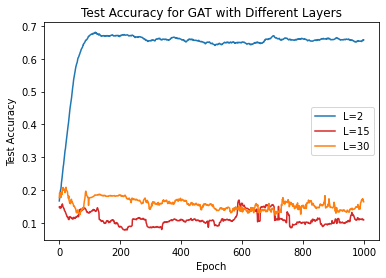

In [8]:
#Test Accuracy
fig, ax = plt.subplots()

# Plot Loss on the first y-axis
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy')
ax.plot(df_all[model_name][0]['Epoch'], df_all[model_name][0]['Test Accuracy'], color='tab:blue', label='L=2')
ax.plot(df_all[model_name][0]['Epoch'], df_all[model_name][1]['Test Accuracy'], color='tab:red', label='L=15')
ax.plot(df_all[model_name][0]['Epoch'], df_all[model_name][2]['Test Accuracy'], color='tab:orange', label='L=30')
ax.set_title(f'Test Accuracy for {namemodel} with Different Layers')

# Add legend
ax.legend()

fig.savefig(f'./result/plot_{dataset}/Test_Accuracy_{namemodel}_{type_norm}_D{dropedge_percent}.png')

# Show the plot
plt.show()

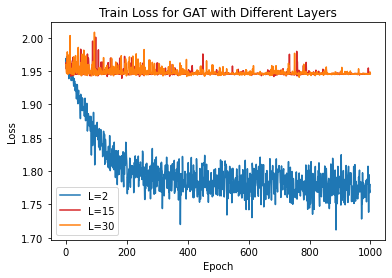

In [9]:
#Loss
fig, ax = plt.subplots()

# Plot Loss on the first y-axis
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.plot(df_all[model_name][0]['Epoch'], df_all[model_name][0]['Loss'], color='tab:blue', label='L=2')
ax.plot(df_all[model_name][0]['Epoch'], df_all[model_name][1]['Loss'], color='tab:red', label='L=15')
ax.plot(df_all[model_name][0]['Epoch'], df_all[model_name][2]['Loss'], color='tab:orange', label='L=30')
ax.set_title(f'Train Loss for {namemodel} with Different Layers')

# Add legend
ax.legend()

fig.savefig(f'./result/plot_{dataset}/Train_loss_{namemodel}_{type_norm}_D{dropedge_percent}.png')

# Show the plot
plt.show()

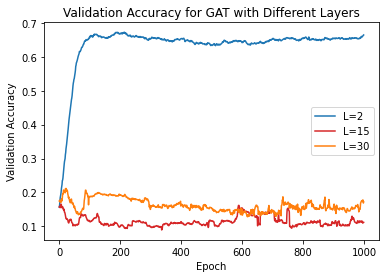

In [10]:
#Validation Accuracy
fig, ax = plt.subplots()

# Plot Loss on the first y-axis
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
ax.plot(df_all[model_name][0]['Epoch'], df_all[model_name][0]['Validation Accuracy'], color='tab:blue', label='L=2')
ax.plot(df_all[model_name][0]['Epoch'], df_all[model_name][1]['Validation Accuracy'], color='tab:red', label='L=15')
ax.plot(df_all[model_name][0]['Epoch'], df_all[model_name][2]['Validation Accuracy'], color='tab:orange', label='L=30')
ax.set_title(f'Validation Accuracy for {namemodel} with Different Layers')

# Add legend
ax.legend()

fig.savefig(f'./result/plot_{dataset}/Validation_accuracy_{namemodel}_{type_norm}_D{dropedge_percent}.png')

# Show the plot
plt.show()

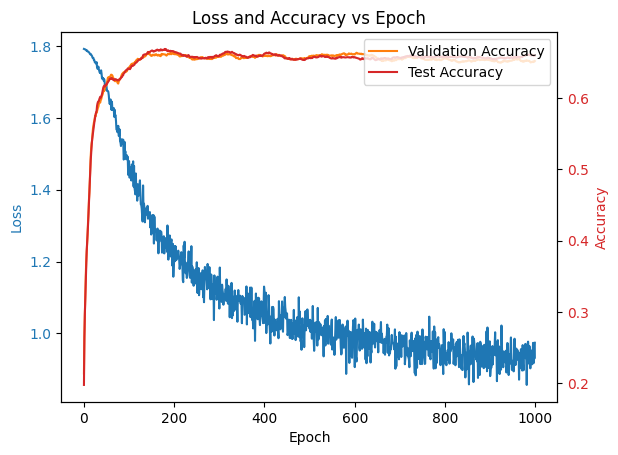

In [ ]:
df = df_all[model_name][0]

# Plot the data
fig, ax1 = plt.subplots()

# Plot Loss on the first y-axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(df['Epoch'], df['Loss'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot accuracies
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:red')
ax2.plot(df['Epoch'], df['Validation Accuracy'], color='tab:orange', label='Validation Accuracy')
ax2.plot(df['Epoch'], df['Test Accuracy'], color='tab:red', label='Test Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a legend for the accuracy lines
ax2.legend(loc='upper right')

# Show the plot
plt.title('Loss and Accuracy vs Epoch')
plt.show()